In [ ]:
# Importamos las librerias necesarias:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Insertamos la conexion con el archivo de R
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_excel("/content/drive/My Drive/mtcars.xlsx")



Mounted at /content/drive


CONOCEMOS LA BASE

In [ ]:
# Una mirada Rapida a los elementos de nuestra base
df.head()


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


ELEMENTOS GENERALES DE LA BASE

In [ ]:
# DIMENSION y tipo de datos
print("La base esta constituida por\n",df.shape[0],"Registros y ",df.shape[1]," Campos \n")
print("La cantidad de elementos nulos es de \n", df.isna().sum(),'\n')
print("Cuyas variables estan descritas en la siguiente lista \n", df.dtypes,"\n")
print("Los valores unicos dentro de la tabla estan referenciados por \n ", df.nunique(axis=0),'\n')
print("A continuacion se muestra un resumen general de los elementos\n")
df.describe()

La base esta constituida por
 32 Registros y  12  Campos 

La cantidad de elementos nulos es de 
 model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64 

Cuyas variables estan descritas en la siguiente lista 
 model     object
mpg      float64
cyl        int64
disp     float64
hp         int64
drat     float64
wt       float64
qsec     float64
vs         int64
am         int64
gear       int64
carb       int64
dtype: object 

Los valores unicos dentro de la tabla estan referenciados por 
  model    32
mpg      25
cyl       3
disp     27
hp       22
drat     22
wt       29
qsec     30
vs        2
am        2
gear      3
carb      6
dtype: int64 

A continuacion se muestra un resumen general de los elementos



,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


ANALISIS PARA LAS VARIABLES NOMINALES (PORCENTAJE DE CARROS Y SU CILINDRAJE)

Los carros que existen tienen 3  distinta cantidad de cilindros
Cada una con los siguientes registros

   cyl  cantidad
0    8        14
1    4        11
2    6         7 



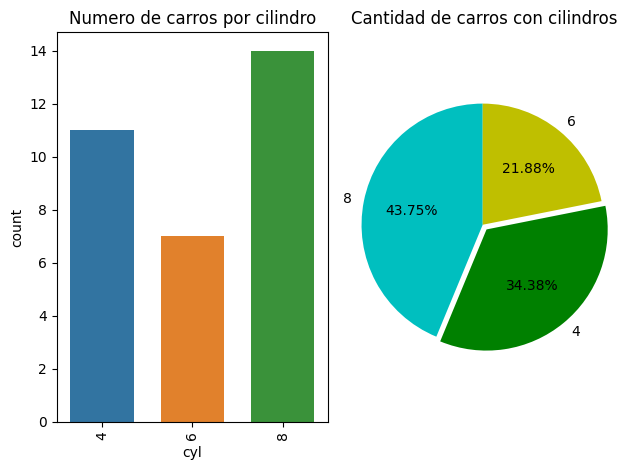

In [ ]:
cilind=list(set(df['cyl']))
totales=[]
for i in cilind:
  totales.append(list(df['cyl']).count(i))

#CREACION DEL DF
res1 = pd.DataFrame()
res1['cyl'] = cilind
res1['cantidad']=totales
res1= res1.sort_values('cantidad',ascending=False)

#RESPUESTA
print("Los carros que existen tienen", len(cilind)," distinta cantidad de cilindros")
print("Cada una con los siguientes registros\n")
print(res1,'\n')

colors = ['c', 'g', 'y']


plt.subplot(122)
plt.pie(res1['cantidad'], labels=res1['cyl'], colors=colors,
        startangle=90,
        explode = (0, 0.05, 0),
        autopct = '%1.2f%%')
plt.axis('equal')
plt.title('Cantidad de carros con cilindros')


plt.subplot(121)
barras=sns.countplot(data=df, x='cyl',  width= 0.7)
barras.set(title="Numero de carros por cilindro")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()





  FORMA V DEL MOTOR

Los carros que existen tienen 2  distinta forma del motor
Cada una con los siguientes registros

  vs2  cantidad
0  No        18
1  Si        14


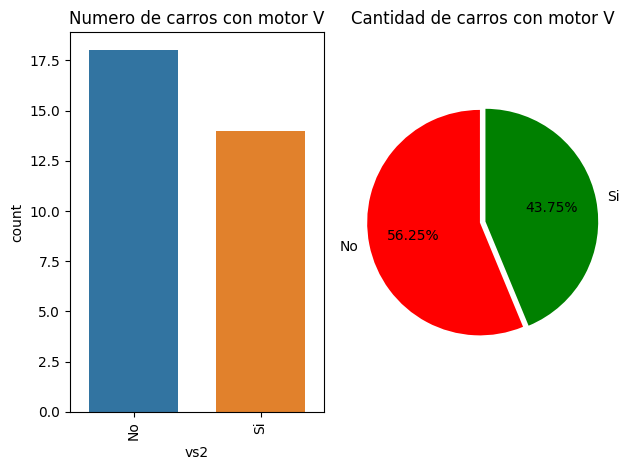

In [ ]:
df['vs2'] = df['vs'].apply(lambda x: 'Si' if x==1 else 'No')
cilind=list(set(df['vs2']))
totales=[]


for i in cilind:
  totales.append(list(df['vs2']).count(i))


#CREACION DEL DF
res1 = pd.DataFrame()
res1['vs2'] = cilind
res1['cantidad']=totales
res1= res1.sort_values('cantidad',ascending=False)

#RESPUESTA
print("Los carros que existen tienen", len(cilind)," distinta forma del motor")
print("Cada una con los siguientes registros\n")
print(res1)


colors = ['r', 'g']

plt.subplot(122)
plt.pie(res1['cantidad'], labels=res1['vs2'], colors=colors,
        startangle=90,
        explode = (0, 0.05),
        autopct = '%1.2f%%')
plt.axis('equal')
plt.title('Cantidad de carros con motor V')

plt.subplot(121)
barras=sns.countplot(data=df, x='vs2',  width= 0.7)
barras.set(title="Numero de carros con motor V")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



Millas por galon

Los valores principales que nos brinda la información de millas por galón son:
count    32.000000
mean     20.090625
std       6.026948
min      10.400000
25%      15.425000
50%      19.200000
75%      22.800000
max      33.900000
Name: mpg, dtype: float64


Text(0.5, 1.0, 'boxplot mpg')

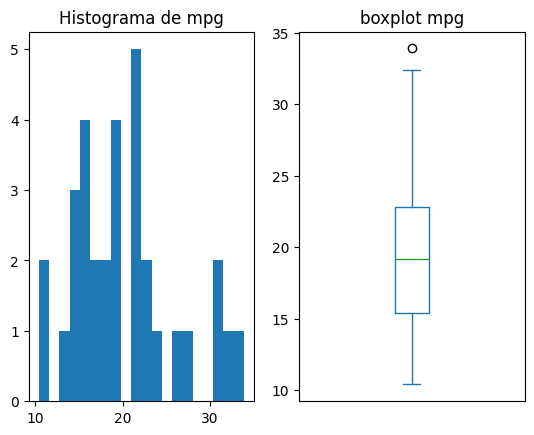

In [ ]:
print("Los valores principales que nos brinda la información de millas por galón son:")
print(df['mpg'].describe())


plt.subplot(121)
plt.hist(df['mpg'], bins=20)
plt.title("Histograma de mpg")

plt.subplot(122)
notas = df['mpg']
s_notas = pd.Series(notas)
notas.plot(kind = 'box')
plt.xticks([])
plt.title('boxplot mpg')


Caballos de fuerza

Los valores principales que nos brinda la información de caballos de fuerza:
count     32.000000
mean     146.687500
std       68.562868
min       52.000000
25%       96.500000
50%      123.000000
75%      180.000000
max      335.000000
Name: hp, dtype: float64


Text(0.5, 1.0, 'boxplot hp')

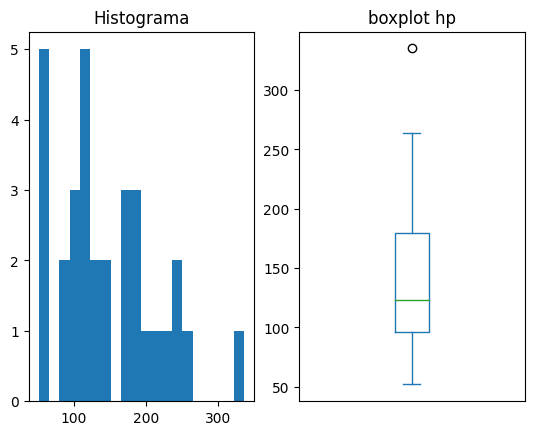

In [ ]:
print("Los valores principales que nos brinda la información de caballos de fuerza:")
print(df['hp'].describe())


plt.subplot(121)
plt.hist(df['hp'], bins=20)
plt.title("Histograma de hp")

plt.subplot(122)
notas = df['hp']
s_notas = pd.Series(notas)
notas.plot(kind = 'box')
plt.xticks([])
plt.title('boxplot hp')


cuato de milla por segundo

Los valores principales que nos brinda la información de cuarto de millas por segundo son:
count    32.000000
mean     17.848750
std       1.786943
min      14.500000
25%      16.892500
50%      17.710000
75%      18.900000
max      22.900000
Name: qsec, dtype: float64


Text(0.5, 1.0, 'boxplot qsec')

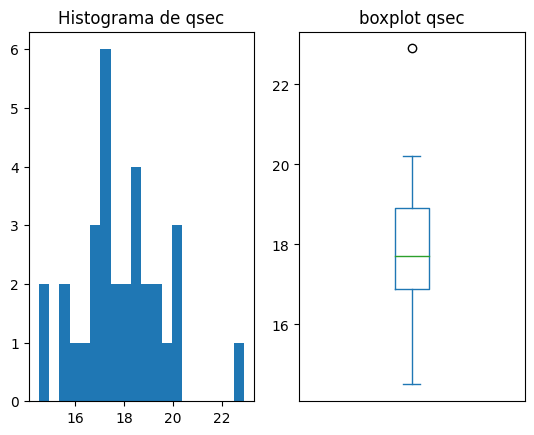

In [ ]:
print("Los valores principales que nos brinda la información de cuarto de millas por segundo son:")
print(df['qsec'].describe())


plt.subplot(121)
plt.hist(df['qsec'], bins=20)
plt.title("Histograma de qsec")

plt.subplot(122)
notas = df['qsec']
s_notas = pd.Series(notas)
notas.plot(kind = 'box')
plt.xticks([])
plt.title('boxplot qsec')


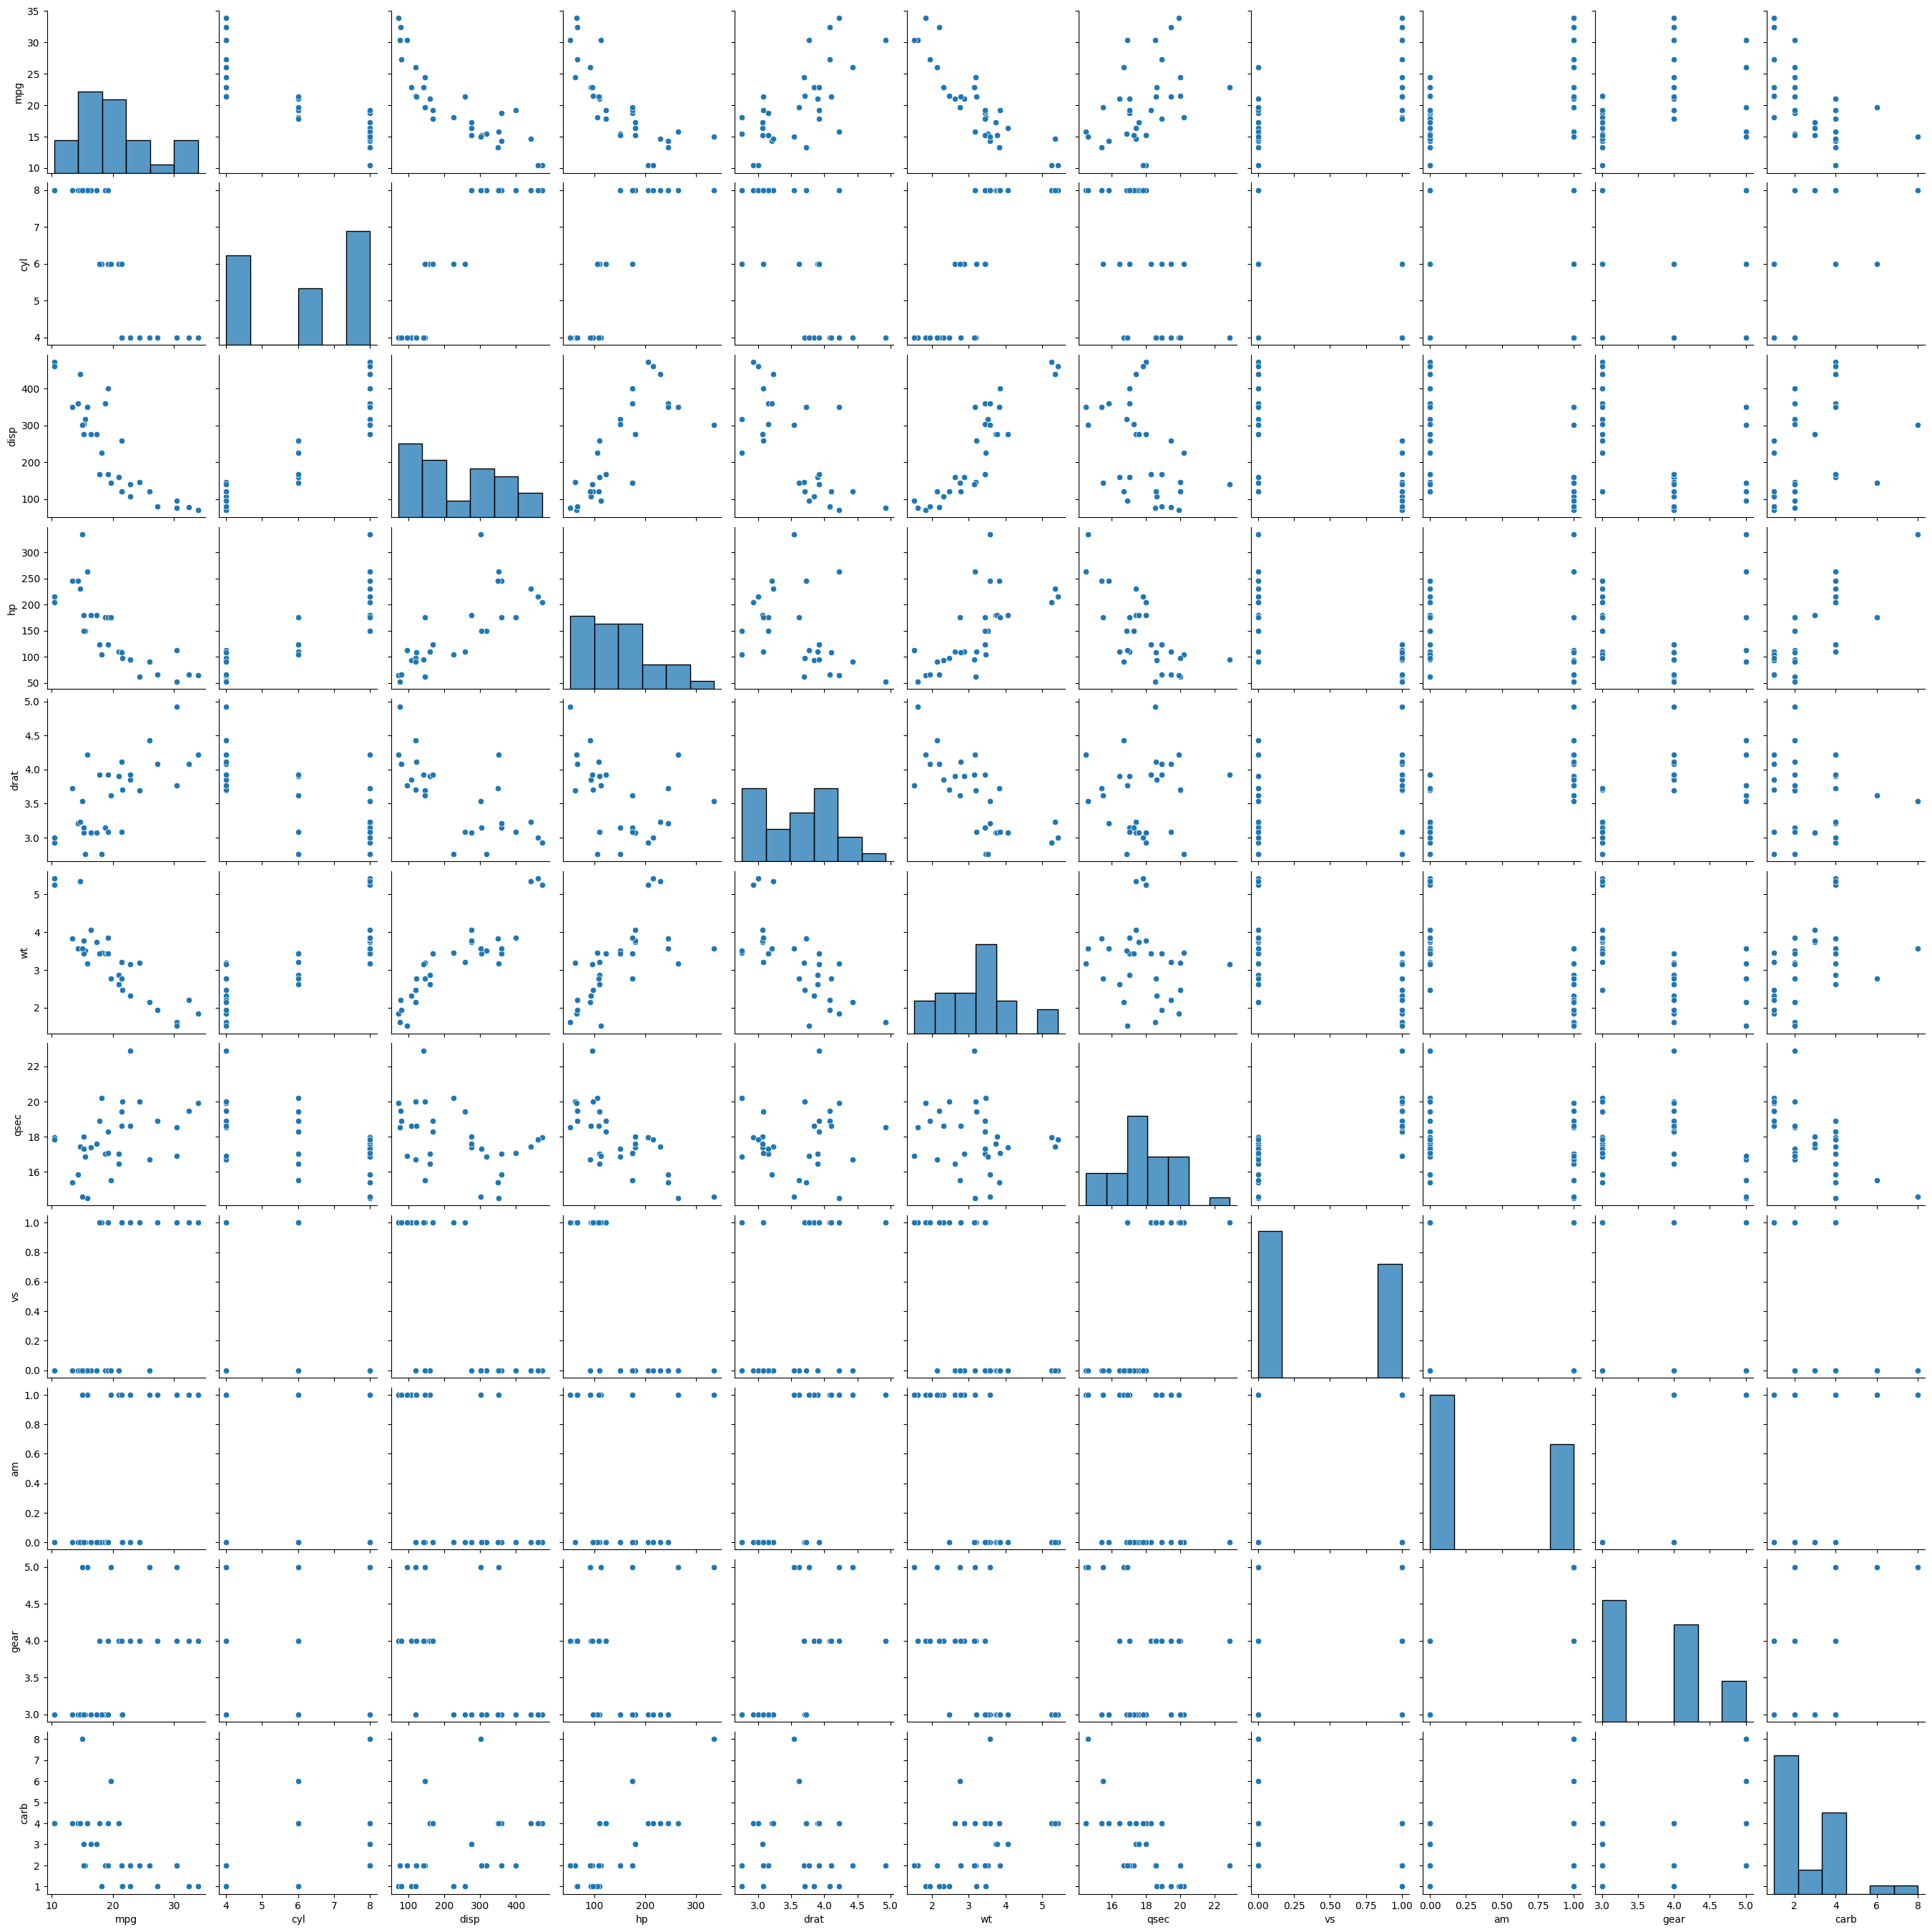

In [ ]:
sns.pairplot(df)

<ipython-input-98-aca9355b6c2f>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


<ipython-input-98-aca9355b6c2f>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

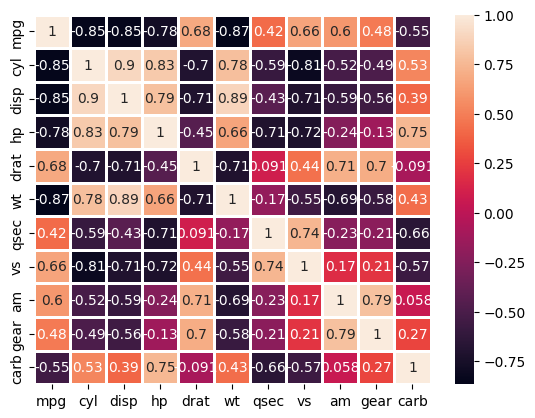

In [ ]:
display(df.corr())
sns.heatmap(df.corr(),annot=True,lw=1)